In [3]:
import pandas as pd
data = pd.read_csv("C:/Users/kavya/Downloads/Basic stats - 1 (6)/Basic stats - 1/sales_data_with_discounts.csv")  

In [5]:
data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [7]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [9]:
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [13]:

statistics = data[numerical_columns].agg(['mean', 'median', 'std'])
mode_values = data[numerical_columns].mode().iloc[0] 
statistics.loc['mode'] = mode_values

print(statistics)


          Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean    5.066667  10453.433333       33812.835556          15.155242   
median  4.000000   1450.000000        5700.000000          16.577766   
std     4.231602  18079.904840       50535.074173           4.220602   
mode    3.000000    400.000000       24300.000000           5.007822   

        Discount Amount  Net Sales Value  
mean        3346.499424     30466.336131  
median       988.933733      4677.788059  
std         4509.902963     46358.656624  
mode          69.177942       326.974801  


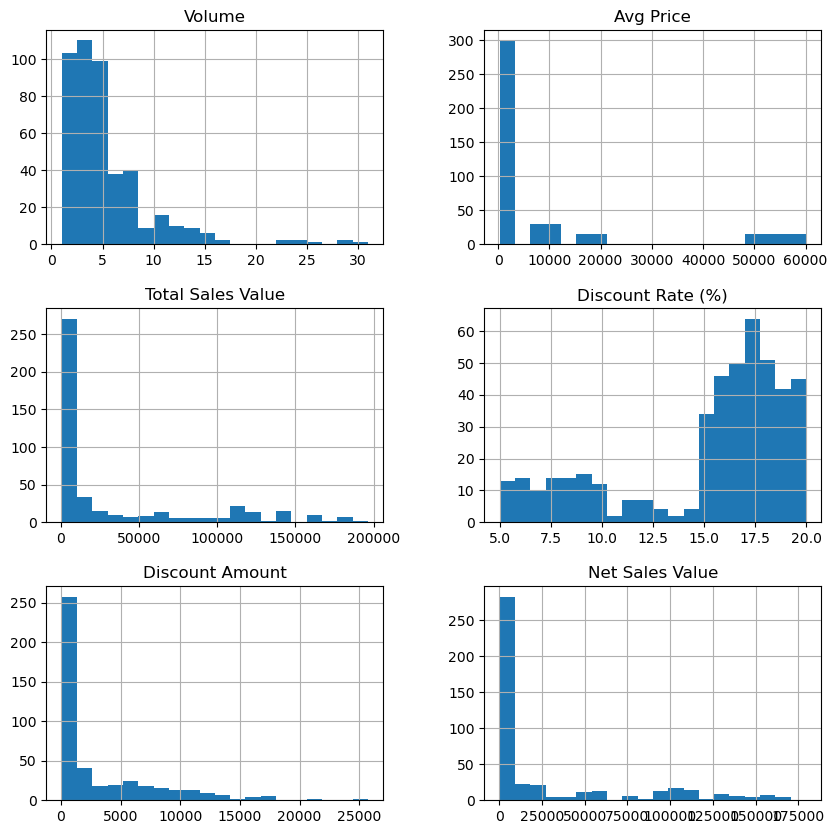

In [31]:
import matplotlib.pyplot as plt
data[numerical_columns].hist(bins=20, figsize=(10, 10))
plt.show()



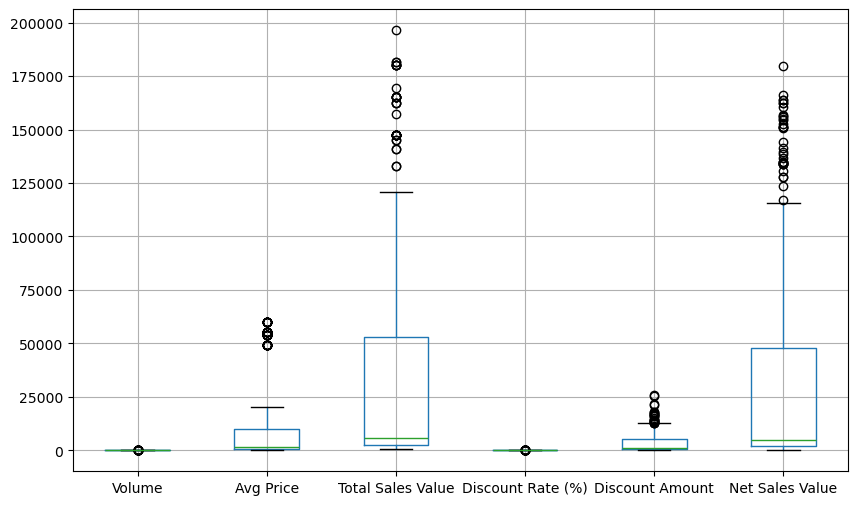

In [17]:
data[numerical_columns].boxplot(figsize=(10, 6))
plt.show()


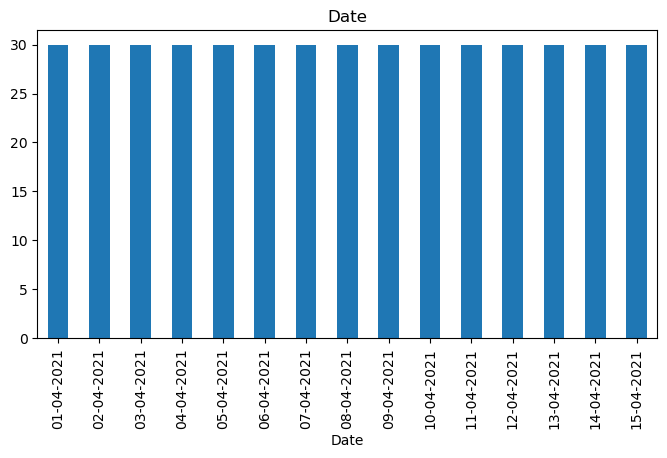

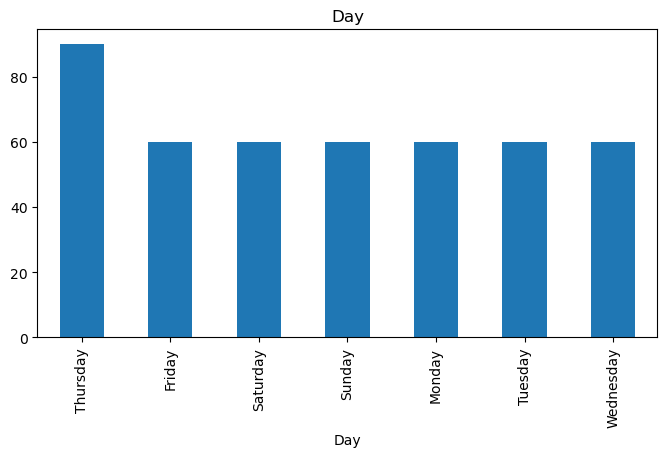

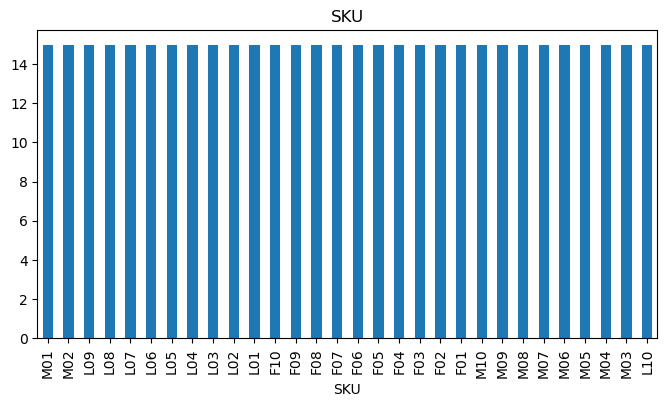

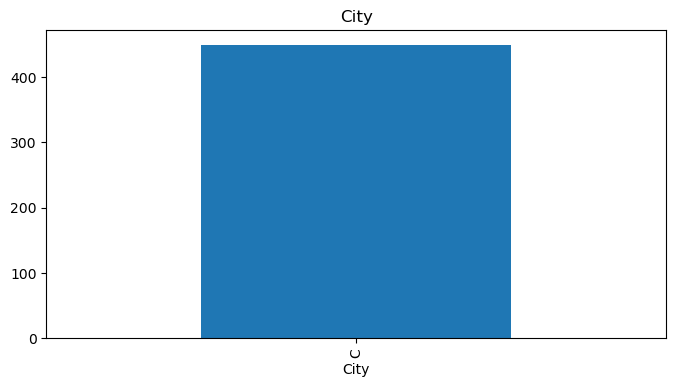

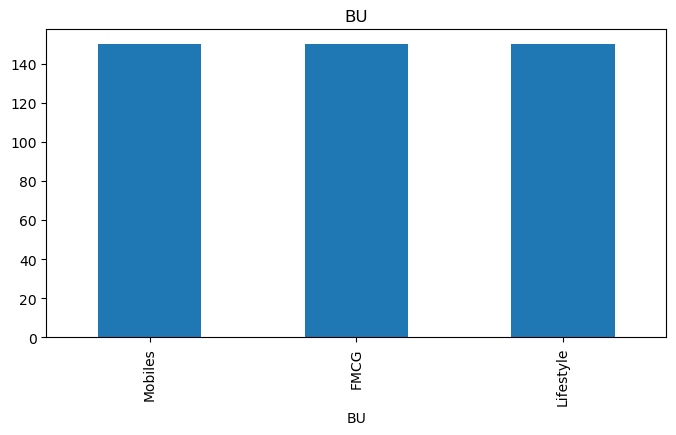

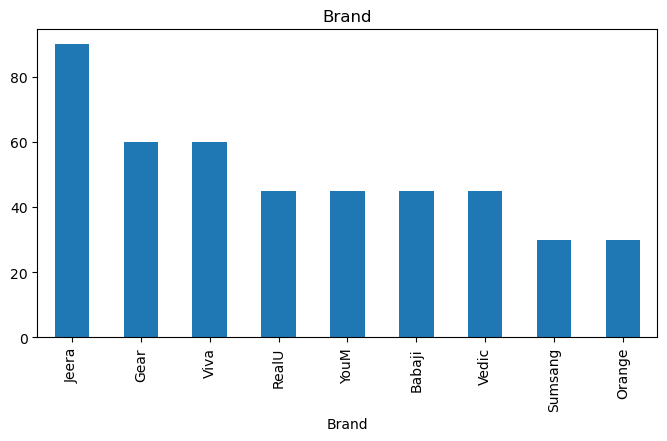

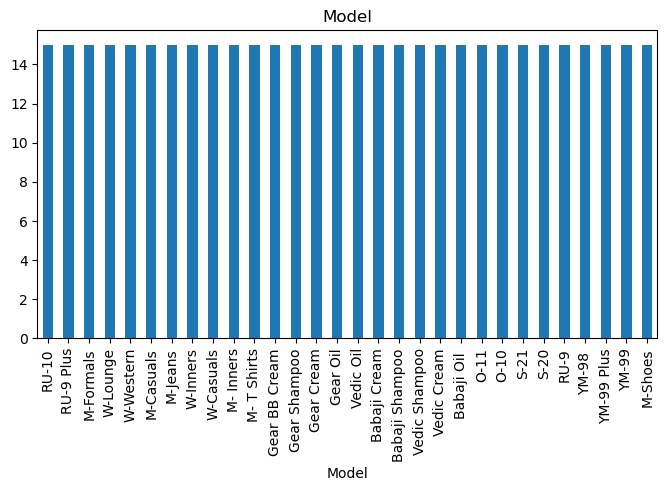

In [19]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].value_counts().plot(kind='bar', figsize=(8, 4), title=col)
    plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data[numerical_columns]), columns=numerical_columns)


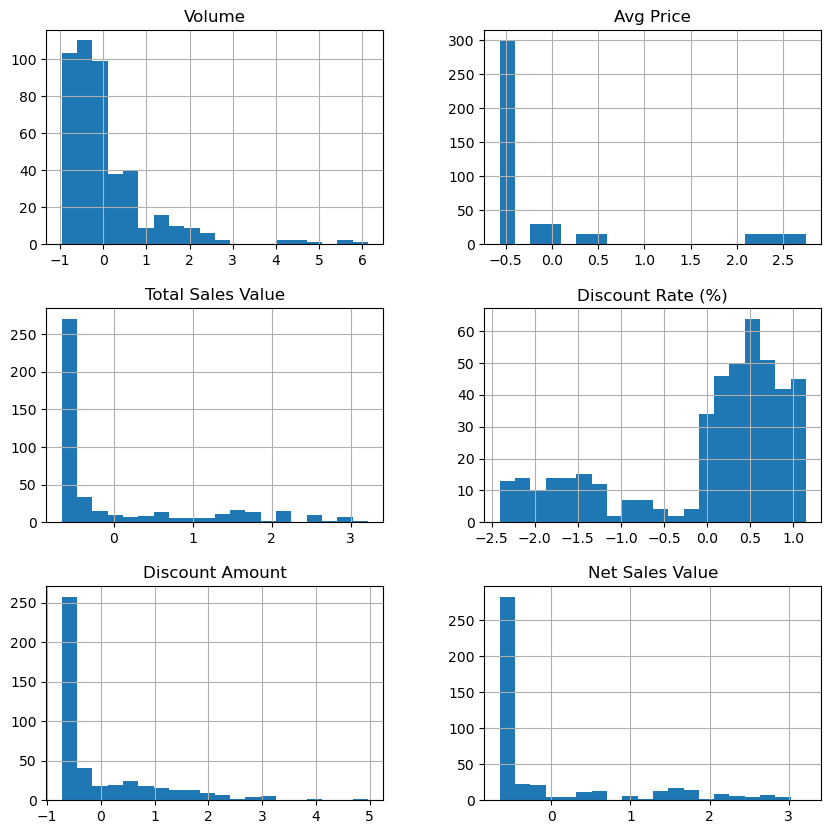

In [23]:
standardized_data.hist(bins=20, figsize=(10, 10))
plt.show()


In [25]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [27]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [ ]:
#CONCLUSION

#The descriptive analytics provided a deeper understanding of the dataset’s central tendencies and spread.
#Visualizations highlighted potential outliers, skewness, and frequency distribution of categorical variables.
#Standardization ensured uniformity across numerical features, preparing the data for machine learning models.
#One-hot encoding transformed categorical variables into a format suitable for model training.